# Building A Neural Network From Scratch

In this demo, we will be creating a neural network w/o using any DeepLearning Libraries (No Tensorflow / PyTorch). 
Only Mathematics and equations and Numerical python will be using.

Core Dependency: Numpy

Resources:
 1. [What is Neural Network](https://www.youtube.com/watch?v=aircAruvnKk)
 2. [Kaggle: Simple mnist no tensorflow NN](https://www.kaggle.com/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(r"./train.csv")

In [3]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(df)
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [5]:
np.random.shuffle(data)

In [6]:
m, n = data.shape
print (m, n)

42000 785


In [7]:
data_test = data[:1000].T
Y_test = data_test[0]
X_test = data[1:n]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]

In [8]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2

In [9]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [10]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [11]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

<ipython-input-9-9f0ad550be7a>:12: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z) / sum(np.exp(Z))
<ipython-input-9-9f0ad550be7a>:12: RuntimeWarning: invalid value encountered in true_divide
  A = np.exp(Z) / sum(np.exp(Z))


Iteration:  0
[7 7 7 ... 4 5 7] [0 3 0 ... 1 0 0]
0.07941463414634146
Iteration:  10
[0 0 0 ... 0 0 0] [0 3 0 ... 1 0 0]
0.09836585365853659
Iteration:  20
[0 0 0 ... 0 0 0] [0 3 0 ... 1 0 0]
0.09836585365853659
Iteration:  30
[0 0 0 ... 0 0 0] [0 3 0 ... 1 0 0]
0.09836585365853659
Iteration:  40
[0 0 0 ... 0 0 0] [0 3 0 ... 1 0 0]
0.09836585365853659
Iteration:  50
[0 0 0 ... 0 0 0] [0 3 0 ... 1 0 0]
0.09836585365853659
Iteration:  60
[0 0 0 ... 0 0 0] [0 3 0 ... 1 0 0]
0.09836585365853659
Iteration:  70
[0 0 0 ... 0 0 0] [0 3 0 ... 1 0 0]
0.09836585365853659
Iteration:  80
[0 0 0 ... 0 0 0] [0 3 0 ... 1 0 0]
0.09836585365853659
Iteration:  90
[0 0 0 ... 0 0 0] [0 3 0 ... 1 0 0]
0.09836585365853659
Iteration:  100
[0 0 0 ... 0 0 0] [0 3 0 ... 1 0 0]
0.09836585365853659
Iteration:  110
[0 0 0 ... 0 0 0] [0 3 0 ... 1 0 0]
0.09836585365853659
Iteration:  120
[0 0 0 ... 0 0 0] [0 3 0 ... 1 0 0]
0.09836585365853659
Iteration:  130
[0 0 0 ... 0 0 0] [0 3 0 ... 1 0 0]
0.09836585365853659
Ite

In [12]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


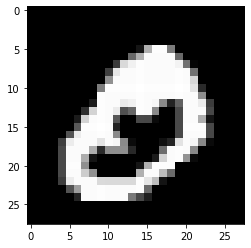

Prediction:  [0]
Label:  3


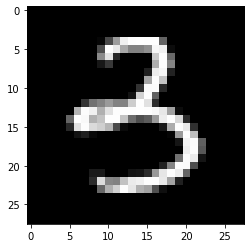

Prediction:  [0]
Label:  0


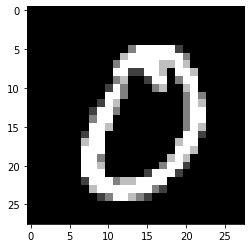

Prediction:  [0]
Label:  4


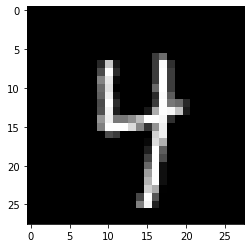

Prediction:  [0]
Label:  1


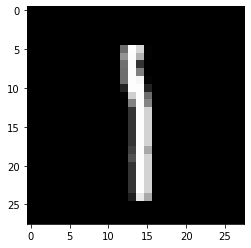

Prediction:  [0]
Label:  7


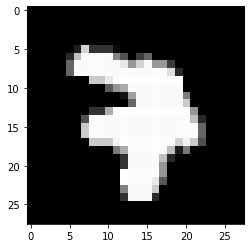

Prediction:  [0]
Label:  6


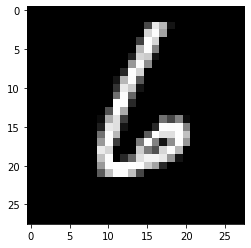

Prediction:  [0]
Label:  0


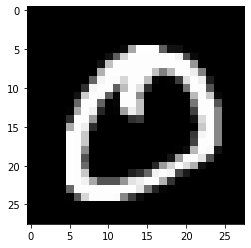

Prediction:  [0]
Label:  4


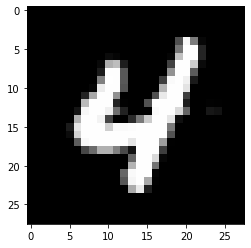

Prediction:  [0]
Label:  4


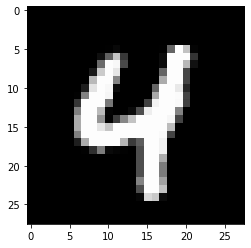

In [13]:
for i in range (10):
    test_prediction(i, W1, b1, W2, b2)